Descargar datos y generar curva de plazos para cetes de la página del Banco de
México www.banxico.org.mx/SieInternet. Reproducir las figuras 1.2.2 y 1.2.3.

<Axes: xlabel='Fecha'>

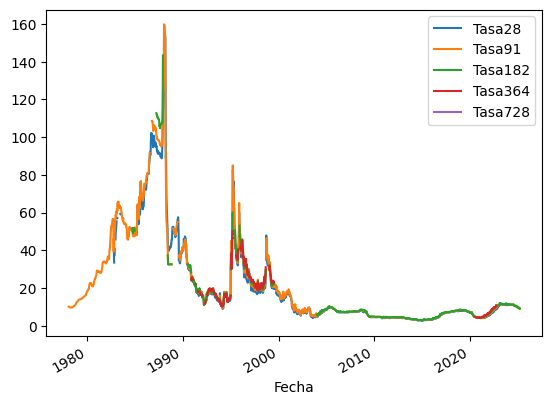

In [74]:
import pandas as pd
#Quitando las advertencias de sobreescritura
pd.options.mode.chained_assignment = None  # default='warn'
#Se lee el archivo
df = pd.read_csv('src/mexico/Consulta_20250322-131301409.csv',encoding ='latin1',skiprows=10)
#Se quitan las primeras filas que no contienen información útil
df = df.drop(index=range(0,8))
#Obteniendo solo las columnas de las tasasa de rendimiento
info_tasas_rend = df.iloc[:,[0,3,6,9,12,15]]
#Renombrando las columnas para un manejo más fácil
info_tasas_rend.columns = ['Fecha','Tasa28','Tasa91','Tasa182','Tasa364','Tasa728']
#Pone la primera columna como índice de la tabla
info_tasas_rend.set_index('Fecha')
#Convierte los registros de la primera columna a objetos de tipo fecha
info_tasas_rend['Fecha'] = pd.to_datetime(info_tasas_rend['Fecha'],dayfirst=True)
#Convierte los registros de las otras columnas a numérico
info_tasas_rend['Tasa28'] = pd.to_numeric(info_tasas_rend['Tasa28'],'coerce')
info_tasas_rend['Tasa91'] = pd.to_numeric(info_tasas_rend['Tasa91'],'coerce')
info_tasas_rend['Tasa182'] = pd.to_numeric(info_tasas_rend['Tasa182'],'coerce')
info_tasas_rend['Tasa364'] = pd.to_numeric(info_tasas_rend['Tasa364'],'coerce')
info_tasas_rend['Tasa728'] = pd.to_numeric(info_tasas_rend['Tasa728'],'coerce')
#Grafica la información
info_tasas_rend.plot(x='Fecha')

<Axes: xlabel='Fecha'>

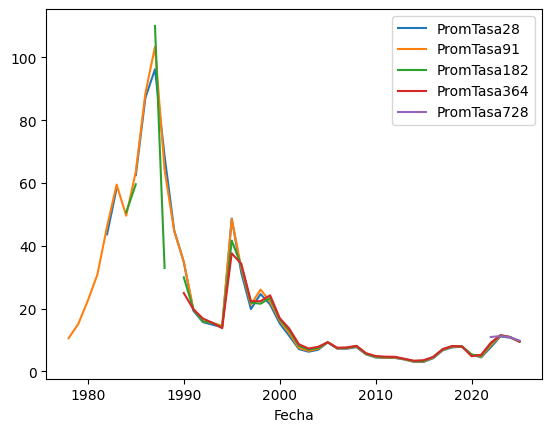

In [75]:
#Declarlando las nuevas etiquetas para las columnas del promedio
etiquetas_proms = {'Tasa28':'PromTasa28','Tasa91':'PromTasa91','Tasa182':'PromTasa182','Tasa364':'PromTasa364','Tasa728':'PromTasa728'}
#Calculando los promedios por año
prom_tasas_anual = info_tasas_rend.groupby(info_tasas_rend.Fecha.dt.year).agg({'Tasa28':'mean','Tasa91':'mean','Tasa182':'mean','Tasa364':'mean','Tasa728':'mean'}).reset_index().rename(columns=etiquetas_proms)
#Graficando los promedios
prom_tasas_anual.plot(x='Fecha')

<Axes: >

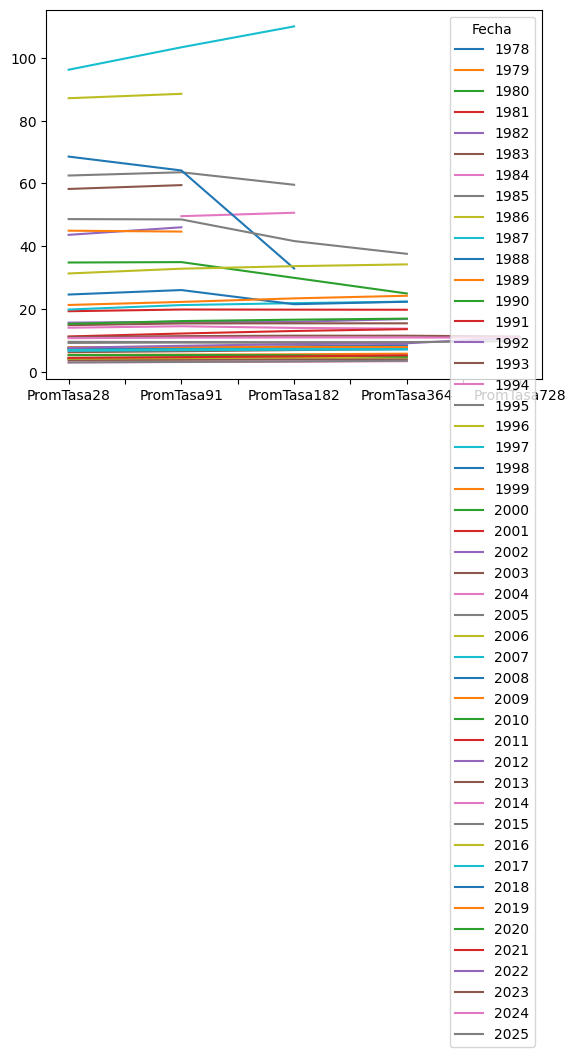

In [76]:
#Calcular las curvas de rendimiento por madurez
prom_tasas_anual.set_index('Fecha',inplace=True)
prom_tasas_anual.transpose().plot()

Descargar datos y generar curva de plazos para notas de la tesorería de EU de la
pagina //home.treasury.gov. Reproducir las figuras 1.2.4 y 1.2.5.

C:\Users\em161\AppData\Local\Temp\ipykernel_38056\3827759438.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  info_tasas_rend_us['Date'] = pd.to_datetime(info_tasas_rend_us['Date'])


<Axes: xlabel='Date'>

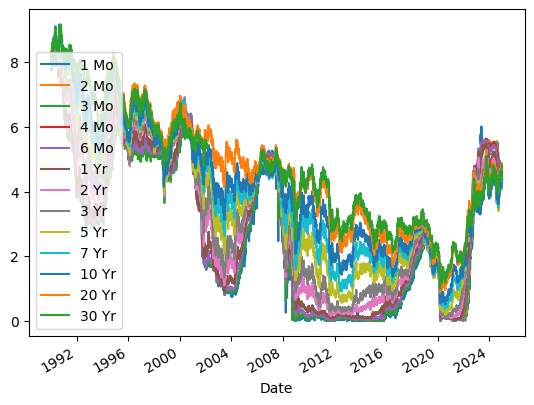

In [77]:
#Se lee el archivo
df_us = pd.read_csv('src/us/yield-curve-rates-1990-2024.csv')
#Obteniendo solo las columnas de las tasasa de rendimiento
info_tasas_rend_us = df_us.sort_index()
#Pone la primera columna como índice de la tabla
info_tasas_rend_us.set_index('Date')
#Convierte los registros de la primera columna a objetos de tipo fecha
info_tasas_rend_us['Date'] = pd.to_datetime(info_tasas_rend_us['Date'])
#Convierte los registros de las otras columnas a numérico
info_tasas_rend_us['1 Mo'] = pd.to_numeric(info_tasas_rend_us['1 Mo'],'coerce')
info_tasas_rend_us['2 Mo'] = pd.to_numeric(info_tasas_rend_us['2 Mo'],'coerce')
info_tasas_rend_us['3 Mo'] = pd.to_numeric(info_tasas_rend_us['3 Mo'],'coerce')
info_tasas_rend_us['4 Mo'] = pd.to_numeric(info_tasas_rend_us['4 Mo'],'coerce')
info_tasas_rend_us['6 Mo'] = pd.to_numeric(info_tasas_rend_us['6 Mo'],'coerce')
info_tasas_rend_us['1 Yr'] = pd.to_numeric(info_tasas_rend_us['1 Yr'],'coerce')
info_tasas_rend_us['2 Yr'] = pd.to_numeric(info_tasas_rend_us['2 Yr'],'coerce')
info_tasas_rend_us['3 Yr'] = pd.to_numeric(info_tasas_rend_us['3 Yr'],'coerce')
info_tasas_rend_us['5 Yr'] = pd.to_numeric(info_tasas_rend_us['5 Yr'],'coerce')
info_tasas_rend_us['7 Yr'] = pd.to_numeric(info_tasas_rend_us['7 Yr'],'coerce')
info_tasas_rend_us['10 Yr'] = pd.to_numeric(info_tasas_rend_us['10 Yr'],'coerce')
info_tasas_rend_us['20 Yr'] = pd.to_numeric(info_tasas_rend_us['20 Yr'],'coerce')
info_tasas_rend_us['30 Yr'] = pd.to_numeric(info_tasas_rend_us['30 Yr'],'coerce')
#Grafica la información
info_tasas_rend_us.plot(x='Date')

<Axes: xlabel='Date'>

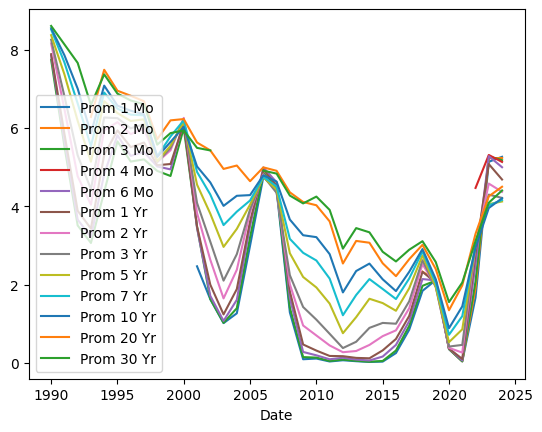

In [78]:
#Declarlando las nuevas etiquetas para las columnas del promedio
etiquetas_proms_us = {'1 Mo':'Prom 1 Mo','2 Mo':'Prom 2 Mo','3 Mo':'Prom 3 Mo','4 Mo':'Prom 4 Mo','6 Mo':'Prom 6 Mo','1 Yr':'Prom 1 Yr','2 Yr':'Prom 2 Yr','3 Yr':'Prom 3 Yr','5 Yr':'Prom 5 Yr','7 Yr':'Prom 7 Yr','10 Yr':'Prom 10 Yr','20 Yr':'Prom 20 Yr','30 Yr':'Prom 30 Yr'}
#Calculando los promedios por año
prom_tasas_anual_us = info_tasas_rend_us.groupby(info_tasas_rend_us.Date.dt.year).agg({'1 Mo':'mean','2 Mo':'mean','3 Mo':'mean','4 Mo':'mean','6 Mo':'mean','1 Yr':'mean','2 Yr':'mean','3 Yr':'mean','5 Yr':'mean','7 Yr':'mean','10 Yr':'mean','20 Yr':'mean','30 Yr':'mean'}).reset_index().rename(columns=etiquetas_proms_us)
#Graficando los promedios
prom_tasas_anual_us.plot(x='Date')

<Axes: >

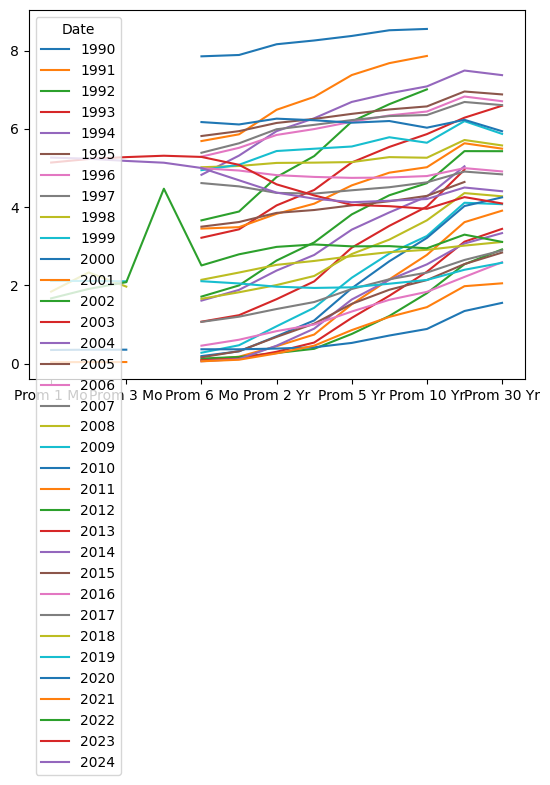

In [79]:
#Calcular las curvas de rendimiento por madurez
prom_tasas_anual_us.set_index('Date',inplace=True)
prom_tasas_anual_us.transpose().plot()

Descargar datos y generar curva de plazos para bnos japoneses de la pagina web
https://www.mof.go.jp. Reproducir las figuras 1.2.6 y 1.2.7.

<Axes: xlabel='Date'>

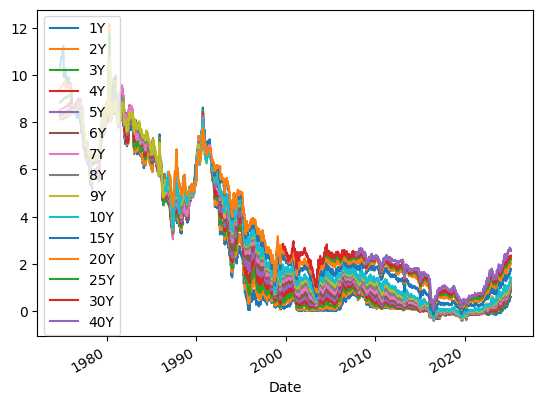

In [80]:
df_jp = pd.read_csv('src/jp/jgbcme_all.csv',skiprows=1)
#Se quitan las primeras filas que no contienen información útil
#Pone la primera columna como índice de la tabla
info_tasas_rend_jp = df_jp.sort_index()
info_tasas_rend_jp.set_index('Date')
#Convierte los registros de la primera columna a objetos de tipo fecha
info_tasas_rend_jp['Date'] = pd.to_datetime(info_tasas_rend_jp['Date'])
#Convierte los registros de las otras columnas a numérico
info_tasas_rend_jp['1Y'] = pd.to_numeric(info_tasas_rend_jp['1Y'],'coerce')
info_tasas_rend_jp['2Y'] = pd.to_numeric(info_tasas_rend_jp['2Y'],'coerce')
info_tasas_rend_jp['3Y'] = pd.to_numeric(info_tasas_rend_jp['3Y'],'coerce')
info_tasas_rend_jp['4Y'] = pd.to_numeric(info_tasas_rend_jp['4Y'],'coerce')
info_tasas_rend_jp['5Y'] = pd.to_numeric(info_tasas_rend_jp['5Y'],'coerce')
info_tasas_rend_jp['6Y'] = pd.to_numeric(info_tasas_rend_jp['6Y'],'coerce')
info_tasas_rend_jp['7Y'] = pd.to_numeric(info_tasas_rend_jp['7Y'],'coerce')
info_tasas_rend_jp['8Y'] = pd.to_numeric(info_tasas_rend_jp['8Y'],'coerce')
info_tasas_rend_jp['9Y'] = pd.to_numeric(info_tasas_rend_jp['9Y'],'coerce')
info_tasas_rend_jp['10Y'] = pd.to_numeric(info_tasas_rend_jp['10Y'],'coerce')
info_tasas_rend_jp['15Y'] = pd.to_numeric(info_tasas_rend_jp['15Y'],'coerce')
info_tasas_rend_jp['20Y'] = pd.to_numeric(info_tasas_rend_jp['20Y'],'coerce')
info_tasas_rend_jp['25Y'] = pd.to_numeric(info_tasas_rend_jp['25Y'],'coerce')
info_tasas_rend_jp['30Y'] = pd.to_numeric(info_tasas_rend_jp['30Y'],'coerce')
info_tasas_rend_jp['40Y'] = pd.to_numeric(info_tasas_rend_jp['40Y'],'coerce')
#Grafica la información
info_tasas_rend_jp.plot(x='Date')

<Axes: xlabel='Date'>

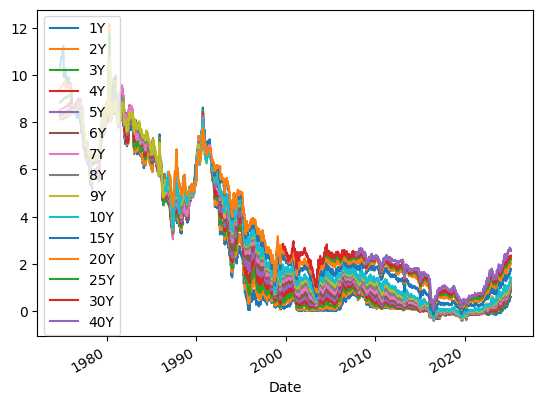

In [81]:
#Declarlando las nuevas etiquetas para las columnas del promedio
etiquetas_proms_jp = {'1Y':'Prom 1Y','2Y':'Prom 2Y','3Y':'Prom 3Y','4Y':'Prom 4Y','5Y':'Prom 5Y','6Y':'Prom 6Y','7Y':'Prom 7Y','8Y':'Prom 8Y','9Y':'Prom 9Y','10Y':'Prom 10Y','15Y':'Prom 15Y','20Y':'Prom 20Y','25Y':'Prom 25Y','30Y':'Prom 30Y','40Y':'Prom 40Y','Date':'Date'}
#Calculando los promedios por año
prom_tasas_anual_jp = info_tasas_rend_jp.groupby(info_tasas_rend_jp.Date.dt.year).agg({'1Y':'mean','2Y':'mean','3Y':'mean','4Y':'mean','5Y':'mean','6Y':'mean','7Y':'mean','8Y':'mean','9Y':'mean','10Y':'mean','15Y':'mean','20Y':'mean','25Y':'mean','30Y':'mean','40Y':'mean'}).reset_index().rename(columns=etiquetas_proms_jp)
#Graficando los promedios
info_tasas_rend_jp.plot(x='Date')

<Axes: >

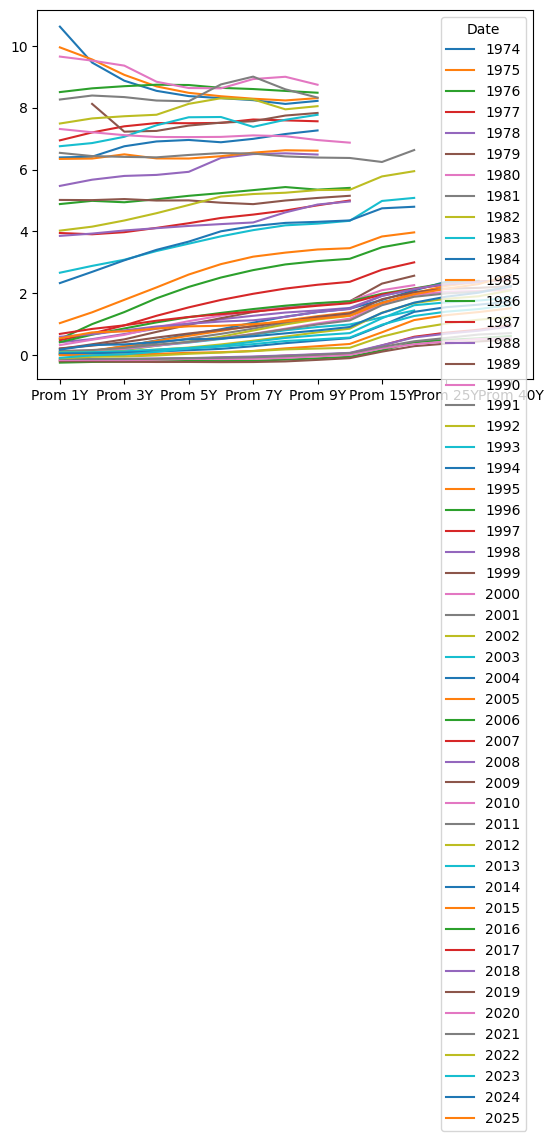

In [82]:
#Calcular las curvas de rendimiento por madurez
prom_tasas_anual_jp.set_index('Date',inplace=True)
prom_tasas_anual_jp.transpose().plot()


In [90]:
from IPython.display import Markdown, display

display(Markdown("src\\reporte-lectura.md"))

# Reporte de Lectura: Capítulos 5 y 6 del libro *Moneda, banca y mercados financieros* de Frederic S. Mishkin

## Capítulo 5: Comportamiento de las tasas de interés

Este capítulo examina los factores determinantes del comportamiento de las tasas de interés en los mercados financieros. 

### Principales temas abordados:

1. **Determinantes de la demanda de activos**: Se analiza la teoría de la demanda de activos desde un enfoque cuantitativo, considerando los siguientes factores clave siempre en un contexto "ceteres paribus":
   - **Riqueza**: La relación entre la riqueza y la demanda de activos es positiva, a más riqueza aumenta la cantidad de demanda de activos.
   - **Rendimientos esperados**: La relación entre los rendimientos esperados y la demanda de activos es positiva, si aumenta el rendimiento esperado de un activo, también aumenta su demanda.
   - **Riesgo**: La relación entre el riesgo y la demanda de activos es negativa, un aumento en el riesgo percibido reduce la demanda de un activo.
   - **Liquidez**: La relación entre la liquidez y la demanda de activos es positiva, si aumenta la liquidez se aumenta la demanda de un activo.

2. **Modelo de oferta y demanda de bonos**: Se examina la mecánica de equilibrio en el mercado de bonos, destacando la relación inversa entre los precios de los bonos y las tasas de interés. Se incluyen modelos gráficos y matemáticos que explican la variación en las tasas ante cambios en la demanda y oferta de instrumentos de deuda:

![Alt text](src\img\curva_demanda-activos.png "Title")

![Alt text](src\img\curva_oferta-activos.png "Title")

3. **Relación entre la oferta monetaria y las tasas de interés**: Se examina el modelo "marco conceptual de preferencia por la liquidez" desarrollado por John Maynar Keynes como una alternativa para determinar la tasa de interés de equilibro distinta al método de oferta y demanda de bonos. Este modelo se analiza de manera análoga al modelo de oferta y demanda de bonos. Se incluyen modelos gráficos y matemáticos que explican la variación en las tasas ante cambios en la demanda y oferta del dinero:

![Alt text](src\img\curva_demanda-dinero.png "Title")

4.- **Efecto del incremento de dinero en las tasas de interés**: Se analiza también el efecto combinado de los factores descritos en el punto anterior. Se toma en consideración el impacto del efecto liquidez, precio e ingreso sobre las tasas de interés y su tiempo de acción. Se presentan 3 escenarios, en cada uno una variable distinta es la dominante y grafican los efectos sobre las tasas de interés.

## Capítulo 6: El riesgo y la estructura temporal de las tasas de interés

En este capítulo, Mishkin desarrolla una perspectiva analítica sobre la diferenciación en las tasas de interés entre distintos instrumentos financieros, introduciendo el concepto de riesgo y la estructura temporal de los rendimientos.

### Principales temas abordados:

1. **Estructura del riesgo de las tasas de interés**: Se estudian las causas por las cuales bonos con el mismo vencimiento pueden presentar diferenciales en sus tasas de interés, incluyendo:
   - **Riesgo de incumplimiento**: Medición del riesgo crediticio a través de calificaciones de agencias y spreads de crédito. Se introduce el concepto de _prima de riesgo_ como el margen diferencial entre las tasas de interés sobre los bonos con riesgo de incumplimiento y los bonos libre de incumplimiento.  Se concluye que: "___un bono sujeto a riesgo de incumplimiento siempre tendrá una prima de riesgo positiva, y un aumento en su riesgo de incumplimiento la aumentará___". Se introducen las evaluaciones de las casas calificadoras:

   | **Moody’s** | **Standard and Poor’s** | **Descripciones** |
   |------------|----------------------|-------------------|
   | Aaa        | AAA                  | De la más alta calidad (riesgo más bajo de incumplimiento) |
   | Aa         | AA                   | Alta calidad |
   | A          | A                    | Calidad media superior |
   | Baa        | BBB                  | Calidad media |
   | Ba         | BB                   | Calidad media inferior |
   | B          | B                    | Especulativo |
   | Caa        | CCC, CC               | Deficiente (alto riesgo de incumplimiento) |
   | C          | D                    | Altamente especulativo |
   
   - **Liquidez**: Se concluye que la liquidez tiene un efecto similar al riesgo de incumplimiento en cuanto a la estructura del riesgo de las tasas de interés reflexionando que: "___una prima de riesgo es con mayor precisión una “prima de riesgo y de liquidez”, pero
por convención se le denomina prima de riesgo.___"
   - **Consideraciones fiscales**: Influencia de las políticas tributarias sobre la rentabilidad neta de los instrumentos financieros, reflexionando sobre el ejemplo de los bonos municipales en EE.UU. cuyos intereses están exentos de impuestos sobre la renta y concluyendo que esto afecta su demanda de manera positiva, reduciendo sus tazas de interés.

2. **Estructura temporal de las tasas de interés**: Se aborda la relación entre los rendimientos de los bonos según su plazo al vencimiento, analizando diferentes enfoques teóricos:
   - **Teoría de las expectativas**: Plantea que las tasas de interés a largo plazo reflejan la trayectoria esperada de las tasas a corto plazo.
   - **Teoría de los mercados segmentados**: Explica la formación de tasas con base en la oferta y demanda de bonos en distintos horizontes temporales.
   - **Teoría de la prima por liquidez y del hábitat preferido**: Considera que los inversionistas exigen una prima de riesgo por asumir vencimientos más largos, ajustando sus decisiones a horizontes temporales específicos.


In [84]:
display(Markdown("src\\reporte-lectura_articulo.md"))

# Lectura de Mishkin [1992].Is the Fisher Effect for Real? A Reexamination of the Relationship Between Inflation and Interest Rates

**Resumen:**
El artículo examina la validez del efecto Fisher, que establece que las tasas de interés nominales reflejan cambios en la inflación esperada. A través de un análisis empírico, los autores encuentran que el efecto Fisher se manifiesta principalmente en el largo plazo, cuando tanto la inflación como las tasas de interés presentan tendencias estocásticas comunes. En contraste, no se encuentra evidencia significativa de un efecto Fisher de corto plazo, es decir, no hay una asociación inmediata entre cambios en la inflación esperada y cambios en las tasas de interés.

**Resultados Principales:**
- No se encuentra evidencia de un efecto Fisher en el corto plazo.
- Se confirma un efecto Fisher de largo plazo cuando la inflación y las tasas de interés presentan tendencias.
- La correlación entre ambas variables es más fuerte en períodos donde se observan tendencias claras.

**Conclusiones:**
El estudio concluye que la relación entre inflación y tasas de interés depende de la presencia de tendencias comunes en sus series de tiempo. Esto sugiere que un fuerte efecto Fisher solo aparecerá en muestras donde ambas variables sigan trayectorias con tendencias significativas.


Este ejercicio requiere los puntos anteriores. Poner a prueba la teoría “Expectations theory” para explicar la curva de estructura de plazo. Para este propósito, utilice datos relativos a un bono en particular de largo plazo (por ejemplo diez, veinte o treinta año). Eliga aquel que tenga mas observaciones. Contraste la curva de rendimientos contra promedios de años posteriores en ventanas adecuadas. Haga una reflexión de los resultados obtenidos

<Axes: xlabel='Date'>

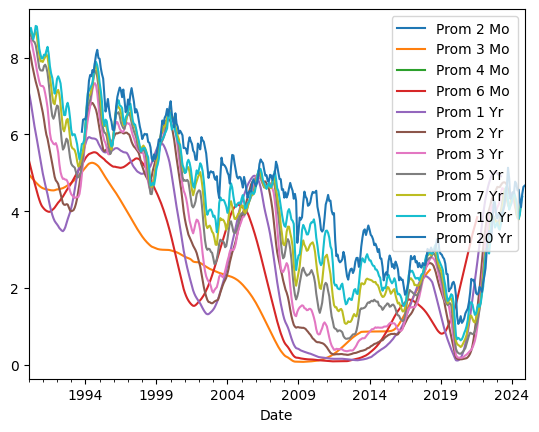

In [85]:
#Declarlando las nuevas etiquetas para las columnas del promedio
etiquetas_proms_us = {'1 Mo':'Prom 1 Mo','2 Mo':'Prom 2 Mo','3 Mo':'Prom 3 Mo','4 Mo':'Prom 4 Mo','6 Mo':'Prom 6 Mo','1 Yr':'Prom 1 Yr','2 Yr':'Prom 2 Yr','3 Yr':'Prom 3 Yr','5 Yr':'Prom 5 Yr','7 Yr':'Prom 7 Yr','10 Yr':'Prom 10 Yr','20 Yr':'Prom 20 Yr','30 Yr':'Prom 30 Yr'}
#Calculando los promedios por año

info_tasas_rend_us['Date'] = pd.to_datetime(info_tasas_rend_us['Date'])
info_tasas_rend_us.set_index('Date',inplace=True)
prom_tasas_mensual_us = info_tasas_rend_us.groupby(pd.Grouper(freq='ME')).agg({'1 Mo':'mean','2 Mo':'mean','3 Mo':'mean','4 Mo':'mean','6 Mo':'mean','1 Yr':'mean','2 Yr':'mean','3 Yr':'mean','5 Yr':'mean','7 Yr':'mean','10 Yr':'mean','20 Yr':'mean','30 Yr':'mean'}).reset_index().rename(columns=etiquetas_proms_us)
prom_tasas_mensual_us['Prom 1 Mo']=prom_tasas_mensual_us['Prom 1 Mo'].shift(-1).rolling(240, 240).mean().shift(-239)
prom_tasas_mensual_us['Prom 2 Mo']=prom_tasas_mensual_us['Prom 2 Mo'].shift(-1).rolling(120, 120).mean().shift(-119)
prom_tasas_mensual_us['Prom 3 Mo']=prom_tasas_mensual_us['Prom 3 Mo'].shift(-1).rolling(80, 80).mean().shift(-79)
prom_tasas_mensual_us['Prom 4 Mo']=prom_tasas_mensual_us['Prom 4 Mo'].shift(-1).rolling(60, 60).mean().shift(-59)
prom_tasas_mensual_us['Prom 6 Mo']=prom_tasas_mensual_us['Prom 6 Mo'].shift(-1).rolling(40, 40).mean().shift(-39)
prom_tasas_mensual_us['Prom 1 Yr']=prom_tasas_mensual_us['Prom 1 Yr'].shift(-1).rolling(20, 20).mean().shift(-19)
prom_tasas_mensual_us['Prom 2 Yr']=prom_tasas_mensual_us['Prom 2 Yr'].shift(-1).rolling(10, 10).mean().shift(-9)
prom_tasas_mensual_us['Prom 3 Yr']=prom_tasas_mensual_us['Prom 3 Yr'].shift(-1).rolling(6, 6).mean().shift(-5)
prom_tasas_mensual_us['Prom 5 Yr']=prom_tasas_mensual_us['Prom 5 Yr'].shift(-1).rolling(4, 4).mean().shift(-3)
prom_tasas_mensual_us['Prom 7 Yr']=prom_tasas_mensual_us['Prom 7 Yr'].shift(-1).rolling(3, 3).mean().shift(-2)
prom_tasas_mensual_us['Prom 10 Yr']=prom_tasas_mensual_us['Prom 10 Yr'].shift(-1).rolling(2, 2).mean().shift(-1)
prom_tasas_mensual_us.drop(columns=['Prom 30 Yr','Prom 1 Mo'],inplace=True)
#Graficando los promedios
prom_tasas_mensual_us.plot(x='Date')

<Axes: xlabel='Date'>

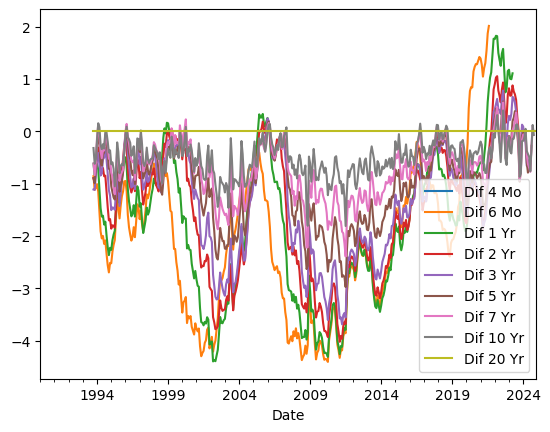

In [102]:
diferencias = pd.DataFrame()
diferencias['Dif 2 Mo'] = pd.to_numeric(prom_tasas_mensual_us['Prom 2 Mo'],'coerce')
diferencias['Dif 3 Mo'] = pd.to_numeric(prom_tasas_mensual_us['Prom 3 Mo'],'coerce')
diferencias['Dif 4 Mo'] = pd.to_numeric(prom_tasas_mensual_us['Prom 4 Mo'],'coerce')
diferencias['Dif 6 Mo'] = pd.to_numeric(prom_tasas_mensual_us['Prom 6 Mo'],'coerce')
diferencias['Dif 1 Yr'] = pd.to_numeric(prom_tasas_mensual_us['Prom 1 Yr'],'coerce')
diferencias['Dif 2 Yr'] = pd.to_numeric(prom_tasas_mensual_us['Prom 2 Yr'],'coerce')
diferencias['Dif 3 Yr'] = pd.to_numeric(prom_tasas_mensual_us['Prom 3 Yr'],'coerce')
diferencias['Dif 5 Yr'] = pd.to_numeric(prom_tasas_mensual_us['Prom 5 Yr'],'coerce')
diferencias['Dif 7 Yr'] = pd.to_numeric(prom_tasas_mensual_us['Prom 7 Yr'],'coerce')
diferencias['Dif 10 Yr'] = pd.to_numeric(prom_tasas_mensual_us['Prom 10 Yr'],'coerce')
diferencias['Dif 20 Yr'] = pd.to_numeric(prom_tasas_mensual_us['Prom 20 Yr'],'coerce')

diferencias = diferencias.iloc[:,2:].sub(diferencias['Dif 20 Yr'],axis=0)
diferencias['Date'] = prom_tasas_mensual_us['Date']
diferencias.set_index('Date')
diferencias.plot(x='Date')